In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [17]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train=y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=['airplanes', 'cars',' birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships','trucks']

In [10]:
def pot_sample(X,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

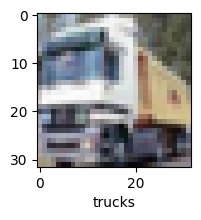

In [11]:
pot_sample(X_train,y_train,1)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [14]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.8126 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.6251 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.5401 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 221s 142ms/step - loss: 1.4817 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.4308 - accuracy: 0.4957


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ann.predict(X_test)
y_predicted_classes=[np.argmax(element) for element in y_pred]

print("Classification report is",classification_report(y_test,y_predicted_classes))

313/313 [==============================] - 13s 41ms/step
Classification report is               precision    recall  f1-score   support

           0       0.56      0.46      0.50      1000
           1       0.58      0.61      0.59      1000
           2       0.32      0.51      0.39      1000
           3       0.33      0.45      0.38      1000
           4       0.51      0.29      0.37      1000
           5       0.62      0.13      0.21      1000
           6       0.51      0.55      0.53      1000
           7       0.72      0.34      0.46      1000
           8       0.40      0.83      0.54      1000
           9       0.56      0.42      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [18]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),


    #dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 93s 59ms/step - loss: 2.0941 - accuracy: 0.3473
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3652 - accuracy: 0.5136
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1959 - accuracy: 0.5831
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0754 - accuracy: 0.6286
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9879 - accuracy: 0.6566
Epoch 6/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9167 - accuracy: 0.6823
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8545 - accuracy: 0.7024
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7971 - accuracy: 0.7259
Epoch 9/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7494 - accuracy: 0.7405
Epoch 10/10
1563/1563 [==============================] - 77s 49

In [19]:

cnn.evaluate(X_test,y_test)


313/313 [==============================] - 5s 15ms/step - loss: 1.1573 - accuracy: 0.6431


[1.1573481559753418, 0.6431000232696533]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_cnn_pred=cnn.predict(X_test)
y_cnn_predicted_classes=[np.argmax(element) for element in y_cnn_pred]

print("Classification report for cnn model is",classification_report(y_test,y_cnn_predicted_classes))

313/313 [==============================] - 8s 26ms/step
Classification report for cnn model is               precision    recall  f1-score   support

           0       0.62      0.73      0.67      1000
           1       0.73      0.82      0.77      1000
           2       0.55      0.54      0.54      1000
           3       0.43      0.48      0.46      1000
           4       0.54      0.64      0.59      1000
           5       0.56      0.53      0.55      1000
           6       0.84      0.61      0.70      1000
           7       0.78      0.64      0.70      1000
           8       0.74      0.72      0.73      1000
           9       0.75      0.71      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



In [24]:
y_cnn_predicted_classes[0:10]

[3, 1, 0, 0, 6, 6, 1, 6, 3, 1]

In [23]:
y_test[0:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [25]:
classes[y_cnn_predicted_classes[0]]

'cats'

TypeError: ignored

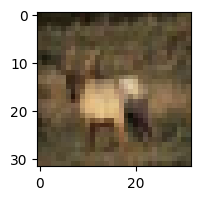

In [27]:
pot_sample(X_train,y_train,3)